# Exploratory Data Analysis — The Metropolitan Museum of Art Open Access

## Introduction & Context

The Metropolitan Museum of Art introduced its Open Access Initiative in February 2017, making all images of public-domain artworks and basic data on all works in its collection available for unrestricted use under Creative Commons Zero (CC0).

In this analysis, I explore The Met's extensive dataset focusing on various aspects of their collection. Specifically, I aim to gain insights into the number and origin of acquisitions over time and the distribution of mediums across different cultures and decades. The dataset used in this analysis contains detailed information on over 448,000 objects. We will be using the downloadable version of this dataset available on [GitHub](https://github.com/metmuseum/openaccess).

Once we load the data into a pandas dataframe, we may begin an exploratory analysis of the variables to understand the nature of the dataset. Subsequently, we take a deeper look into the collection leveraging variables that shed light on the types of art the museum has acquired from various regions throughout the years.

### Objectives
- **Explore the number and origin of acquisitions over time:** Understand how the museum's collection has grown and evolved over the years, identifying any significant trends or changes.
- **Analyze the distribution of mediums across different cultures and decades:** Examine the variety of art forms and how these are distributed across different cultures and time periods.
- **Identify key trends and patterns in the museum's collection:** Highlight notable patterns and insights that can inform future research or exhibitions.

### Key Questions
- **Acquisition Trends:** How has the number of acquisitions changed over time?
- **Geographical Origin:** Which regions or cultures have the most significant representation in the museum's collection?
- **Medium and Material:** What are the most common mediums and materials used in the artworks? How do these vary across different cultures and time periods?

### Methods
To achieve these objectives and answer the key questions, the following methods will be used:
- **Data Cleaning and Preprocessing:** Handling missing values, correcting data types, and ensuring the dataset is in a usable format.
- **Descriptive Statistics:** Generating summary statistics to understand the basic characteristics of the dataset.
- **Data Visualization:** Creating various plots and charts to visualize the data and uncover patterns.
- **Time Series Analysis:** Analyzing how the number of acquisitions has changed over time.
- **Categorical Analysis:** Examining the distribution of mediums, materials, and other categorical variables.

With these objectives, questions, and methods outlined, we can proceed to the actual analysis, starting with importing the necessary libraries and loading the dataset.

## Data loading

In [5]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
import datetime as dt
import missingno as msno
import plotly.express as px

In [6]:
metdb = pd.read_csv('MetObjects.csv', low_memory=False)

## Initial Data Exploration

In [8]:
metdb.shape

(448203, 43)

Dataset composed by 448,203 rows and 43 columns

In [10]:
metdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448203 entries, 0 to 448202
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Object Number            448203 non-null  object
 1   Is Highlight             448203 non-null  bool  
 2   Is Public Domain         448203 non-null  bool  
 3   Object ID                448203 non-null  int64 
 4   Department               448203 non-null  object
 5   Object Name              445568 non-null  object
 6   Title                    416756 non-null  object
 7   Culture                  186518 non-null  object
 8   Period                   71882 non-null   object
 9   Dynasty                  23018 non-null   object
 10  Reign                    10817 non-null   object
 11  Portfolio                20370 non-null   object
 12  Artist Role              259909 non-null  object
 13  Artist Prefix            88928 non-null   object
 14  Artist Display Name 

### All variables explained

(This explanation of all variables contained on the original data is solely based on my own interpretation of the data. The Met Museum did not provide further info on the variables and how they describe the objects of their collection)  

Object Number: Unique identifier for each object in the collection.  
Is Highlight: Indication whether the object is a highlight (selected work of art from the permanent collection representing a culture and time period).  
Is Public Domain: Boolean value indicating whether the object is in the public domain.  
Object ID: Unique numerical identifier for each object.  
Department: Department within the museum that is responsible for the object, e.g., "European Paintings".  
Object Name: Name or title of the object.  
Title: Title given to the object (descriptive name or title given by the artist).  
Culture: Cultural origin of the object, e.g., "Roman", "Egyptian".  
Period: Historical period to which the object belongs, e.g., "Renaissance".  
Dynasty: Dynasty during which the object was created, applicable mostly to objects from ancient civilizations.  
Reign: Reign of a particular ruler during which the object was created.  
Portfolio: If the object is part of a larger portfolio or series, this would be noted here.  
Artist Role: Role of the artist in creating the object, e.g., "Painter", "Sculptor".  
Artist Prefix: Any prefix used with the artist's name, e.g., "Sir".  
Artist Display Name: Full name of the artist as displayed, e.g., "Vincent van Gogh".  
Artist Display Bio: Brief biography of the artist.  
Artist Suffix: Any suffix used with the artist's name, e.g., "Jr.".  
Artist Alpha Sort: Artist's name formatted for sorting purposes.  
Artist Nationality: Nationality of the artist.  
Artist Begin Date: Birth year of the artist.  
Artist End Date: Death year of the artist.  
Object Date: Date or estimated date when the object was created.  
Object Begin Date: Starting date of the estimated period during which the object was created.  
Object End Date: Ending date of the estimated period during which the object was created.  
Medium: Materials or techniques used to create the object, e.g., "Oil on canvas".  
Dimensions: Physical dimensions of the object.  
Credit Line: Information on how the object was acquired, e.g., "Gift of John Doe, 2020".  
Geography Type: Type of geographical information available, e.g., "Country", "City".  
City: City where the object was created or found.  
State: State or province where the object was created or found.  
County: County where the object was created or found.  
Country: Country where the object was created or found.  
Region: Region within a country where the object was created or found.  
Subregion: More specific area within a region where the object was created or found.  
Locale: Specific locale within a subregion where the object was created or found.  
Locus: Exact location or spot where the object was found.  
Excavation: Information about any excavation during which the object was found.  
River: River near which the object was found, if applicable.  
Classification: Classification or category of the object, e.g., "Painting", "Sculpture".  
Rights and Reproduction: Information about the rights and reproduction permissions for the object.  
Link Resource: URL or link to additional resources or the object’s webpage on The Met’s website.  
Metadata Date: Date and time when the metadata for the object was last updated.  
Repository: Storage location of the object.

In [13]:
metdb.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"


In [14]:
metdb.tail()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository
448198,1994.338.10,False,False,750826,Drawings and Prints,Print,"Eric, King of Sweden",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
448199,1994.338.12,False,False,750827,Drawings and Prints,Print,Louis XIII of France,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
448200,1994.338.15,False,False,750828,Drawings and Prints,Print,George Rem,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
448201,1994.338.16,False,False,750829,Drawings and Prints,Print,Henry de la Tour d'Auvergne,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"
448202,1986.1180.500,False,False,750830,Drawings and Prints,Print,"Mr. Necker, Ministre d'Etat et Directeur Génér...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,4/3/2017 8:00:08 AM,"Metropolitan Museum of Art, New York, NY"


<p>The methods head() and tail() are helpful to quickly preview the data, ensure it was loaded correctly, and get a sense of what the variables look like. The info() method provides a concise summary of the dataframe, including the number of non-null entries, data types of each variable. This is important for understanding the structure of the data, identifying missing values, and ensuring that data types are appropriate for the intended analysis.</p>
<p>These preliminary steps also inform how an analysis of the dataset may be sucessful. There are a few columns that refer to the artists (Artist role, prefix, name, bio, nationality, begin and end date, etc). The Rest of the columns are related to the artworks themselves (title, culture, period, dynasty, medium, dimensions, geography info, etc).</p>

In [16]:
metdb.nunique()

Object Number              445627
Is Highlight                    2
Is Public Domain                2
Object ID                  448203
Department                     20
Object Name                 27037
Title                      225553
Culture                      7101
Period                       1695
Dynasty                       341
Reign                         356
Portfolio                    2908
Artist Role                  5664
Artist Prefix                5290
Artist Display Name         56390
Artist Display Bio          40951
Artist Suffix                1644
Artist Alpha Sort           56400
Artist Nationality           3811
Artist Begin Date           20795
Artist End Date             21229
Object Date                 29630
Object Begin Date            2074
Object End Date              2033
Medium                      61445
Dimensions                 241145
Credit Line                 37116
Geography Type                125
City                         2495
State         

There are 448,203 artworks by 56,390 artists.  
'Object ID' and 'Link Resource' are reflecting 448,203 unique values, matching the total number of rows on the dataframe, meaning these could be unique identifiers of the artworks. On 'Title', aproximately half of values is not unique, so this variable is not a good identifier of artworks.  
'Repository' and 'Metadata Date' both contain only one unique value, meaning all artworks belong to the Metropolitan Museum of Art and metadata entry occurred on the same date.

## Missing Data

In [19]:
# count of missing values per column
missing_counts = metdb.isnull().sum()

# filtering columns with and without missing values
with_null = missing_counts[missing_counts > 0].index.tolist()
without_nulls = missing_counts[missing_counts == 0].index.tolist()

print(f"{len(with_null)} columns with missing values:\n{with_null}\n\n"
      f"{len(without_nulls)} columns without missing values:\n{without_nulls}")

33 columns with missing values:
['Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign', 'Portfolio', 'Artist Role', 'Artist Prefix', 'Artist Display Name', 'Artist Display Bio', 'Artist Suffix', 'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date', 'Artist End Date', 'Object Date', 'Medium', 'Dimensions', 'Credit Line', 'Geography Type', 'City', 'State', 'County', 'Country', 'Region', 'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification', 'Rights and Reproduction']

10 columns without missing values:
['Object Number', 'Is Highlight', 'Is Public Domain', 'Object ID', 'Department', 'Object Begin Date', 'Object End Date', 'Link Resource', 'Metadata Date', 'Repository']


In [20]:
metdb.isnull().sum().sort_values()

Object Number                   0
Link Resource                   0
Object End Date                 0
Object Begin Date               0
Metadata Date                   0
Repository                      0
Is Highlight                    0
Is Public Domain                0
Object ID                       0
Department                      0
Credit Line                   670
Object Name                  2635
Medium                       8048
Object Date                 15594
Title                       31447
Classification              58279
Dimensions                  62843
Artist Display Name        187092
Artist Alpha Sort          187115
Artist Role                188294
Artist Display Bio         224139
Artist Begin Date          232969
Artist End Date            235378
Artist Nationality         252071
Culture                    261685
Artist Prefix              359275
Country                    373753
Period                     376321
Geography Type             389740
Region        

In [21]:
null_proportion = metdb.isnull().mean()

# threshold percentages of missing values
thresholds = {'75%': 0.75, '50%': 0.50, '25%': 0.25}

# filtering columns based on thresholds above
filtered_cols = {threshold: null_proportion[null_proportion > value].index.tolist() 
                    for threshold, value in thresholds.items()}

for threshold, columns in filtered_cols.items():
    print(f"{len(columns)} out of {metdb.shape[1]} columns with over {threshold} missing values:\n{columns}\n")

18 out of 43 columns with over 75% missing values:
['Period', 'Dynasty', 'Reign', 'Portfolio', 'Artist Prefix', 'Artist Suffix', 'Geography Type', 'City', 'State', 'County', 'Country', 'Region', 'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Rights and Reproduction']

23 out of 43 columns with over 50% missing values:
['Culture', 'Period', 'Dynasty', 'Reign', 'Portfolio', 'Artist Prefix', 'Artist Display Bio', 'Artist Suffix', 'Artist Nationality', 'Artist Begin Date', 'Artist End Date', 'Geography Type', 'City', 'State', 'County', 'Country', 'Region', 'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Rights and Reproduction']

26 out of 43 columns with over 25% missing values:
['Culture', 'Period', 'Dynasty', 'Reign', 'Portfolio', 'Artist Role', 'Artist Prefix', 'Artist Display Name', 'Artist Display Bio', 'Artist Suffix', 'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date', 'Artist End Date', 'Geography Type', 'City', 'State', 'County', 'Country', 'Region', 

In [22]:
# summary statistics for missing data
missing_summary = metdb.isnull().sum().to_frame('Total Missing')
missing_summary['% Missing'] = (metdb.isnull().mean() * 100).round(2)

# filtering out columns without missing values
missing_summary = missing_summary[missing_summary['Total Missing'] > 0]

missing_summary_sorted = missing_summary.sort_values(by='% Missing')
print(missing_summary_sorted)

                         Total Missing  % Missing
Credit Line                        670       0.15
Object Name                       2635       0.59
Medium                            8048       1.80
Object Date                      15594       3.48
Title                            31447       7.02
Classification                   58279      13.00
Dimensions                       62843      14.02
Artist Display Name             187092      41.74
Artist Alpha Sort               187115      41.75
Artist Role                     188294      42.01
Artist Display Bio              224139      50.01
Artist Begin Date               232969      51.98
Artist End Date                 235378      52.52
Artist Nationality              252071      56.24
Culture                         261685      58.39
Artist Prefix                   359275      80.16
Country                         373753      83.39
Period                          376321      83.96
Geography Type                  389740      86.96


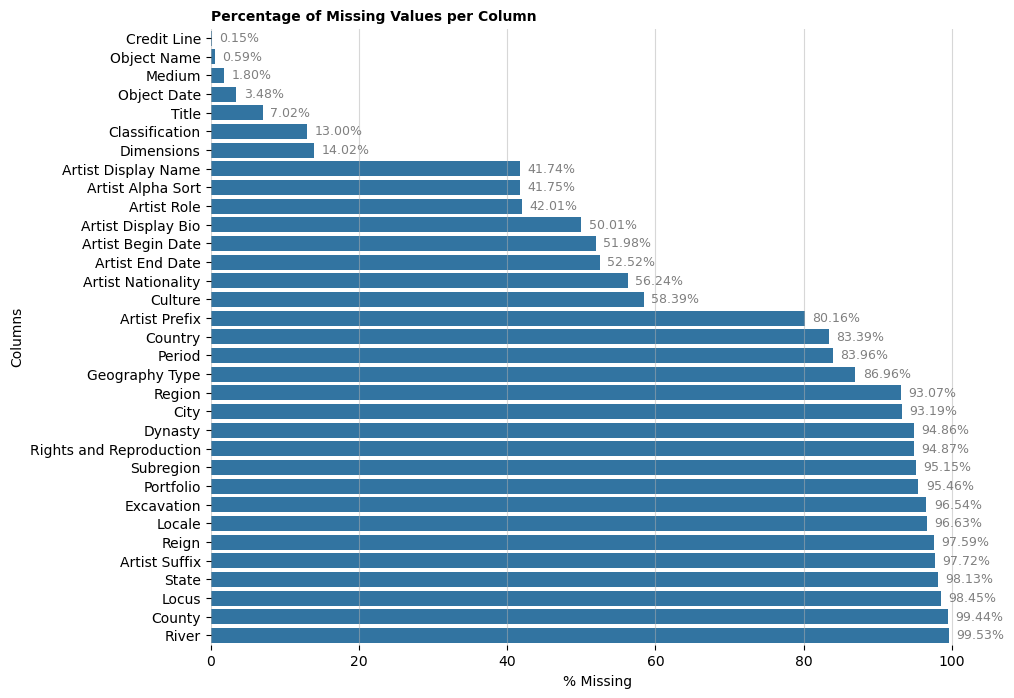

In [23]:
# barplot for missing values

plt.figure(figsize=(10, 8))
barplot = sns.barplot(x=missing_summary_sorted['% Missing'], y=missing_summary_sorted.index, color="TAB:blue")
plt.title('Percentage of Missing Values per Column', loc='left', fontdict=dict(fontweight='bold', fontsize='10'))
plt.xlabel('% Missing')
plt.ylabel('Columns')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.grid(axis='x', alpha=0.5)

for index, value in enumerate(missing_summary_sorted['% Missing']):
    plt.text(value + 1, index, f'{value:.2f}%', color='TAB:grey', va='center', ha='left', fontsize=9)

plt.show()

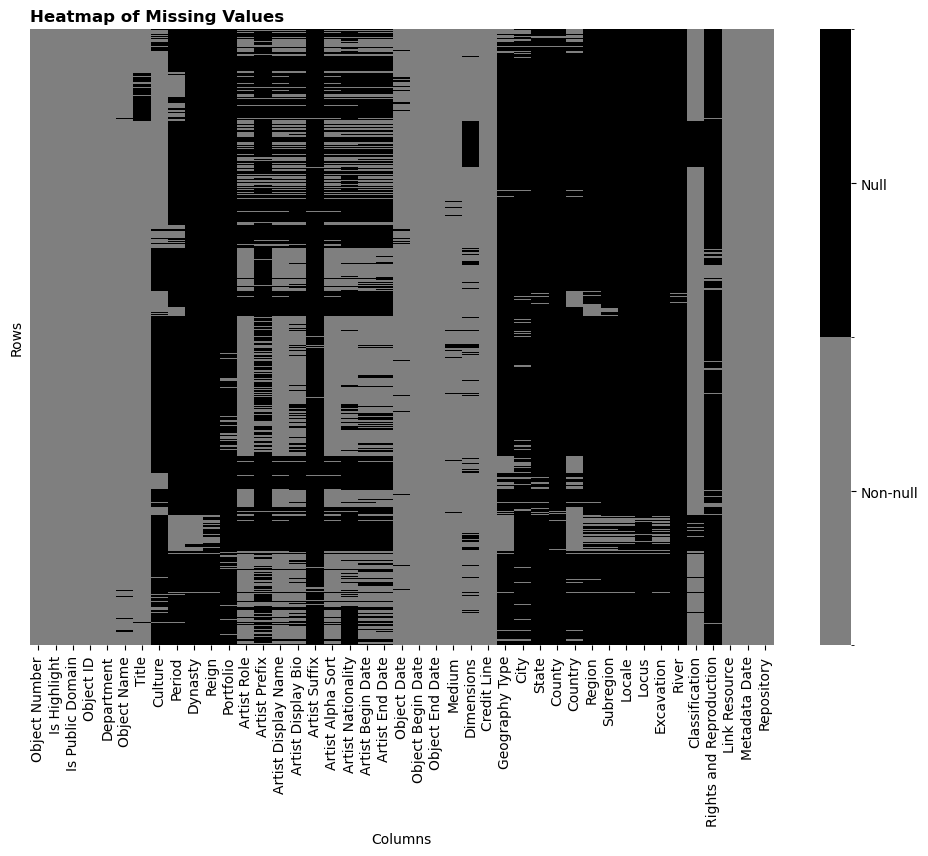

In [24]:
# heatmap of missing values

cmap = ListedColormap(['tab:gray', 'black'])
bounds = [0, 0.5, 1]
norm = BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(12, 8))
sns.heatmap(metdb.isnull(), cbar=True, cmap=cmap, norm=norm, yticklabels=False)
plt.title('Heatmap of Missing Values', loc='left', fontdict={'fontweight': 'bold', 'fontsize': 12})
plt.xlabel('Columns')
plt.ylabel('Rows')

# legend
cbar = plt.gca().collections[0].colorbar
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['Non-null', 'Null'])

plt.show()

## Data Exploration & Visualization

Let's create a function to visualize the boolean type variables through piecharts.  
Then we simply need to call the function and pass the variables needed: 'Is Highlight' and 'Is Public Domain'.

In [27]:
def plot_pie_chart(data, boolean_column, title, colors=['dodgerblue', '#555555']):
    counts = data[boolean_column].value_counts()
    
    # calculate total count for percentages
    total = counts.sum()
    
    fig, ax = plt.subplots(figsize=(5, 5))
    wedges, texts, autotexts = ax.pie(counts, colors=colors, startangle=140, 
                                      autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, p * total / 100),
                                      textprops=dict(color="w"))
    
    ax.set_title(f'Distribution of values in "{boolean_column}"', fontsize=14, family='Arial', color='black', loc='left')
    ax.legend(wedges, counts.index, title=boolean_column, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.show()

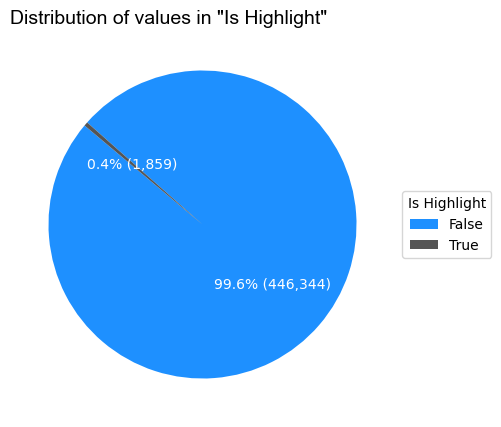

In [28]:
plot_pie_chart(metdb, 'Is Highlight', 'Distribution of Highlighted Artworks')

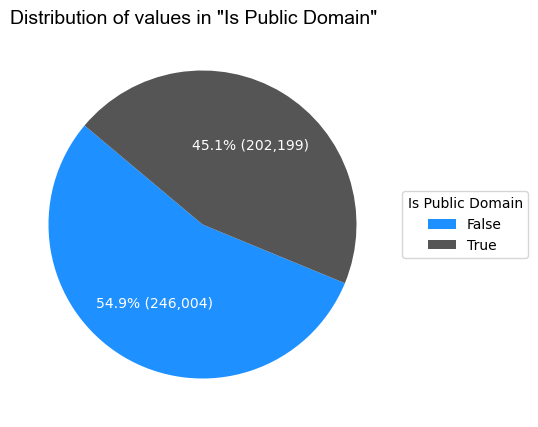

In [29]:
plot_pie_chart(metdb, 'Is Public Domain', 'Distribution of Public Domain Artworks')

We can also create a function to call whenever we want to visualize the top values of a variable through a barchart.  
Let's name it plot_top_values and then we would need only to provide the dataset, the variable name, and the number of top values to visualize.

In [31]:
def plot_top_values(data, variable, n_top_values, color='TAB:blue'):
    top_values = data[variable].value_counts().nlargest(n_top_values)

    plt.figure(figsize=(6, 4))
    sns_barplot = sns.barplot(x=top_values.values, y=top_values.index, color=color)
    plt.tick_params(axis='y', which='major', left=False)
    plt.tick_params(axis='x', which='major', bottom=False)

    sns.despine(left=True, bottom=True)
    plt.grid(axis='x', alpha=0.2)

    plt.xlabel('')
    plt.ylabel('')
    plt.title(f'Top values in "{variable}"', loc='left', fontdict=dict(fontweight='bold', fontsize='10'))
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)

    # adding labels to bars
    for i, v in enumerate(top_values.values):
        color = 'TAB:gray'
        offset = 100
        ha = "left"
        plt.text(v + offset, i, f'{v:,}', color=color, ha=ha, va='center', fontsize=9)

    #plt.savefig(f'top_{variable}.svg', bbox_inches='tight', pad_inches=0.2)
    plt.show()

In [32]:
artist_counts = metdb['Artist Display Name'].value_counts()
artist_counts[:10]

Artist Display Name
Walker Evans                 9659
Kinney Brothers              4282
Allen & Ginter               3184
W. Duke, Sons & Co.          3148
Goodwin & Company            2747
Unknown                      2581
Brewster & Co.               2296
American Tobacco Company     1993
Bowman Gum Company           1992
Topps Chewing Gum Company    1232
Name: count, dtype: int64

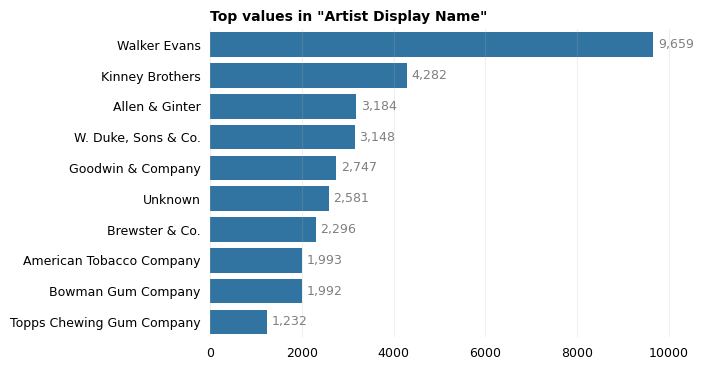

In [33]:
plot_top_values(metdb, 'Artist Display Name', 10)

In [34]:
nationality_counts = metdb['Artist Nationality'].value_counts()
nationality_counts[:20]

Artist Nationality
American                       63137
French                         18675
Italian                        12658
French|French                   9163
British                         8508
American|American               7441
German                          7365
Japanese                        6259
Italian|Italian                 4528
French|French|French            4148
British|British                 2623
Dutch                           2447
Chinese                         2345
Austrian                        1462
Netherlandish                   1452
Spanish                         1277
German|German                   1249
British|British|British         1146
Netherlandish|Netherlandish     1057
American|American|American      1051
Name: count, dtype: int64

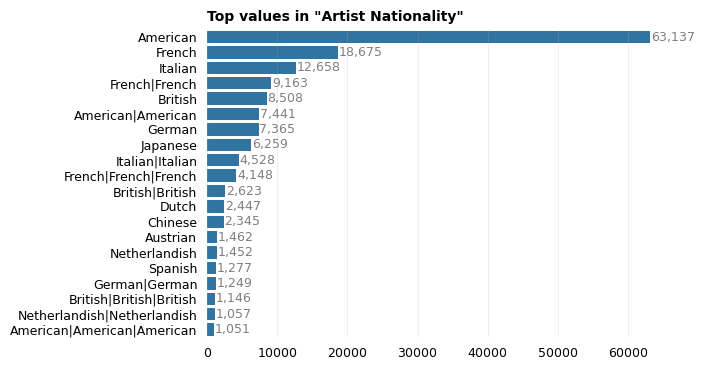

In [35]:
plot_top_values(metdb, 'Artist Nationality', 20)

<p>Repetitions such as 'French|French' in the artist nationality column are likely due to data entry inconsistencies or duplication in the source dataset. This redundancy may have occurred when the same information was recorded multiple times for the same artist without proper validation or cleaning. So it's clear we need some cleaning and consolidation of the data to provide a more accurate representation of the nationality distribution.</p>
<p>'Netherlandish' historically refers to a group of artists otherwise known as the Flemish Primitives, who were active in what is now Belgium during the Renaissance period. Given this historical context, including 'Netherlandish' under the 'Dutch' nationality may not be accurate, therefore no handling of these values seems required.</p>

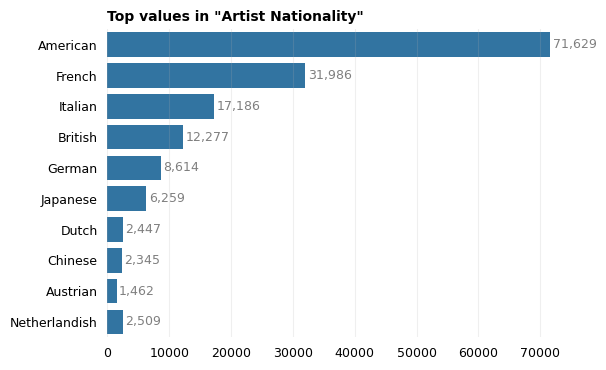

In [37]:
# Handling redundancy in nationalities
nationality_counts['American'] += nationality_counts.get('American|American', 0)
nationality_counts['American'] += nationality_counts.get('American|American|American', 0)
nationality_counts['French'] += nationality_counts.get('French|French', 0)
nationality_counts['French'] += nationality_counts.get('French|French|French', 0)
nationality_counts['Italian'] += nationality_counts.get('Italian|Italian', 0)
nationality_counts['British'] += nationality_counts.get('British|British', 0)
nationality_counts['British'] += nationality_counts.get('British|British|British', 0)
nationality_counts['German'] += nationality_counts.get('German|German', 0)
nationality_counts['Netherlandish'] += nationality_counts.get('Netherlandish|Netherlandish', 0)

redundant_nationalities = [
    'American|American', 
    'French|French', 
    'French|French|French', 
    'Italian|Italian', 
    'British|British', 
    'British|British|British', 
    'Netherlandish|Netherlandish', 
    'German|German', 
    'American|American|American'
]

nationality_counts.drop(redundant_nationalities, inplace=True, errors='ignore')

top_nationalities = nationality_counts.head(10)

plt.figure(figsize=(6, 4))
sns_barplot = sns.barplot(x=top_nationalities.values, y=top_nationalities.index, color='TAB:blue')

plt.tick_params(axis='y', which='major', left=False)
plt.tick_params(axis='x', which='major', bottom=False)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

sns.despine(left=True, bottom=True)
plt.grid(axis='x', alpha=0.2)

plt.xlabel('')
plt.ylabel('')
plt.title('Top values in "Artist Nationality"', loc='left', fontdict=dict(fontweight='bold', fontsize='10'))

for i, v in enumerate(top_nationalities.values):
    plt.text(v + 400, i, f'{v:,}', color='TAB:gray', ha='left', va='center', fontsize=9)

plt.savefig('top_nationality.svg', bbox_inches='tight', pad_inches=0.2)
plt.show()

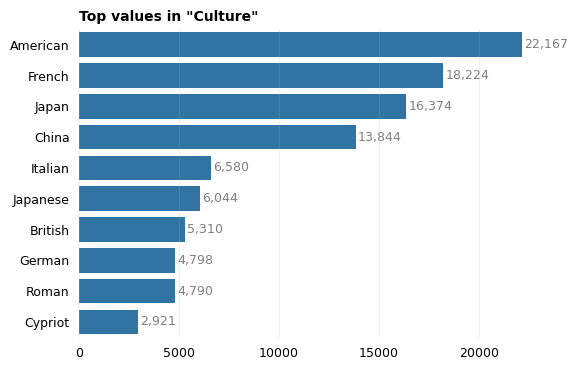

In [38]:
plot_top_values(metdb, 'Culture', 10)

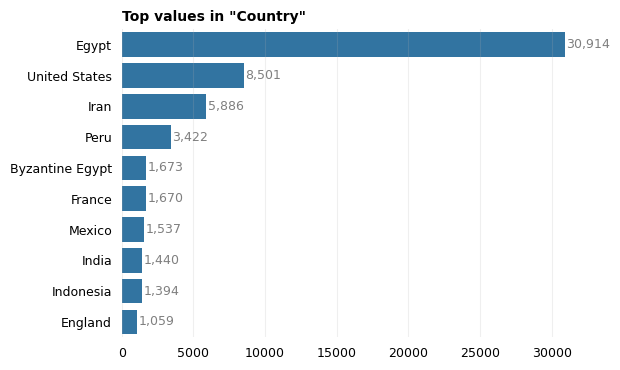

In [39]:
plot_top_values(metdb, 'Country', 10)
# artworks are mostly from Egypt although the top culture is American, which is consistent with the artist nationality above (~71.6% of artists are Americans).

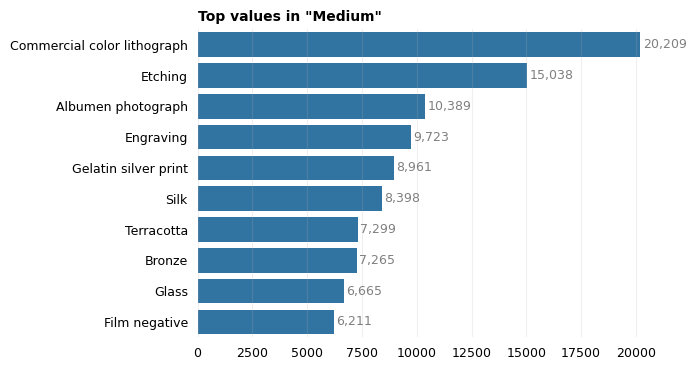

In [40]:
plot_top_values(metdb, 'Medium', 10)

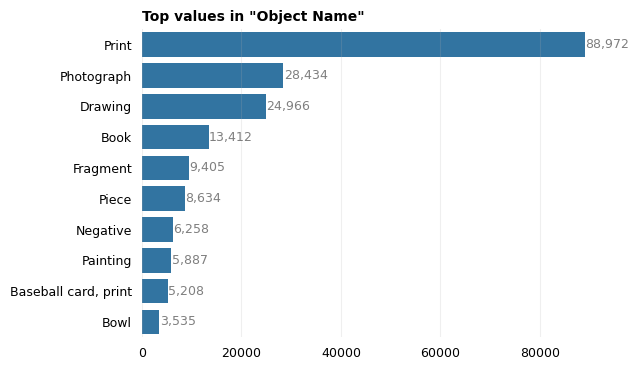

In [41]:
plot_top_values(metdb, 'Object Name', 10)

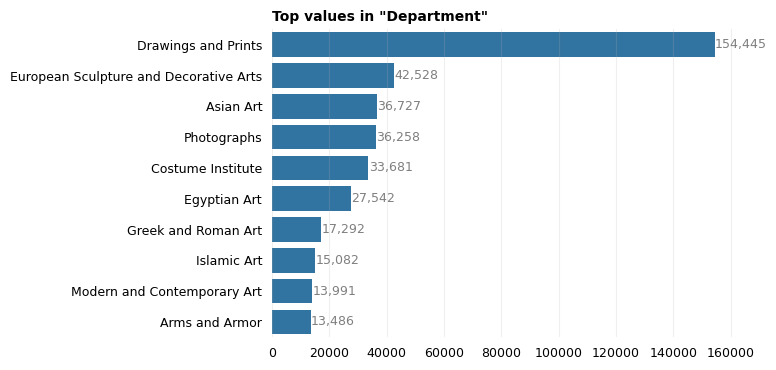

In [42]:
plot_top_values(metdb, 'Department', 10)

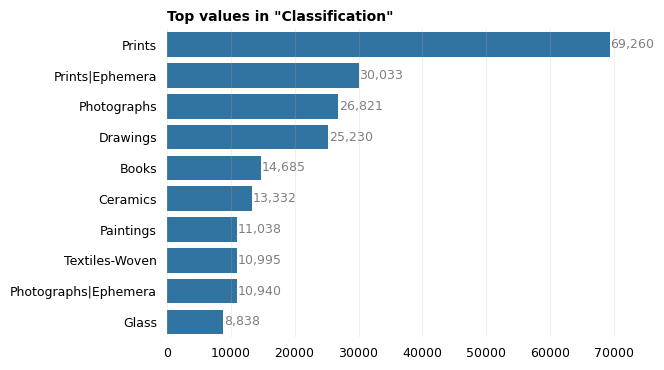

In [43]:
plot_top_values(metdb, 'Classification', 10)

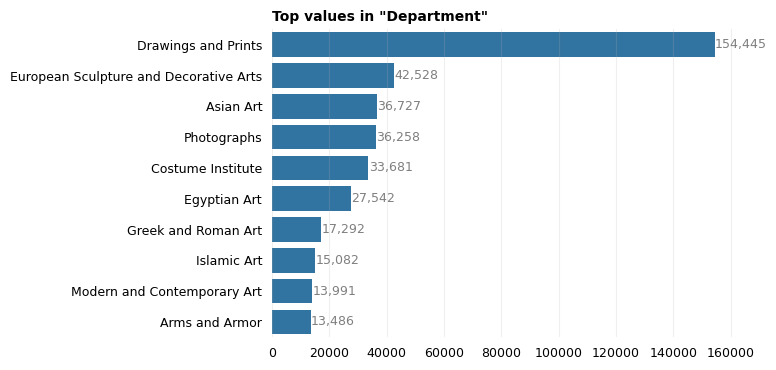

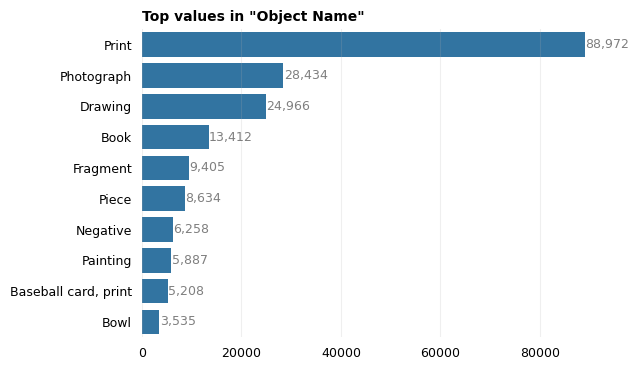

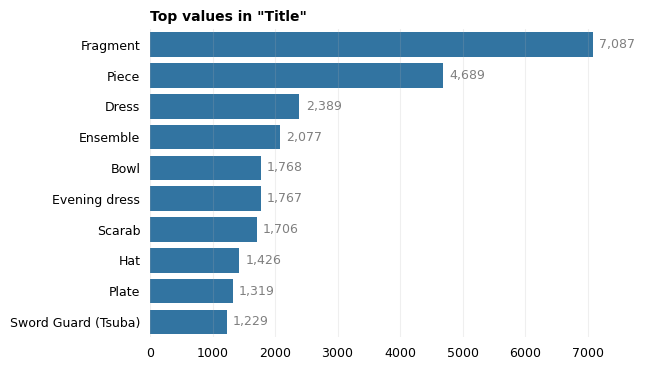

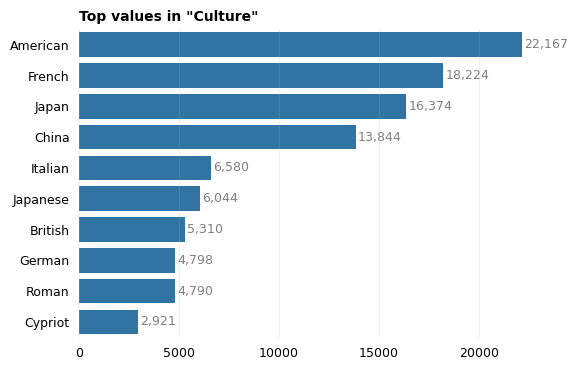

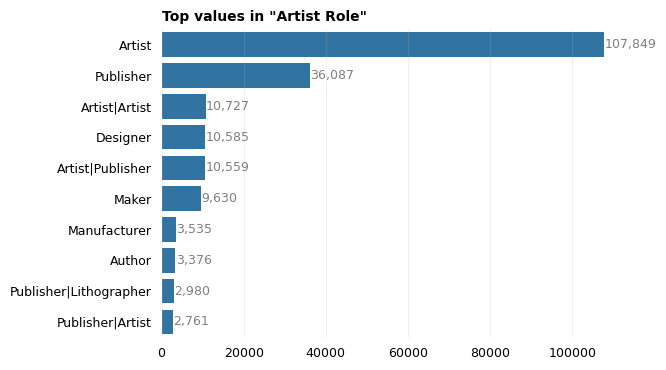

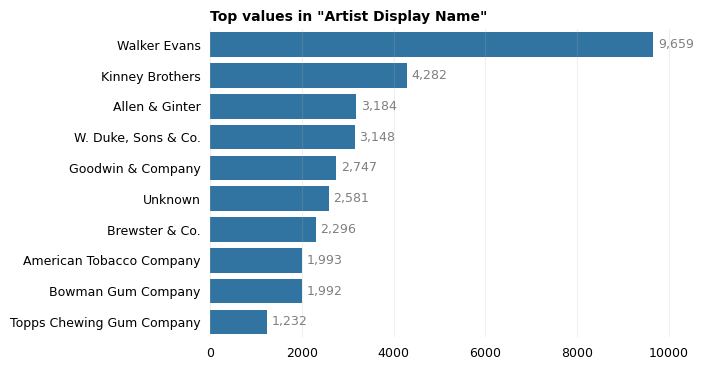

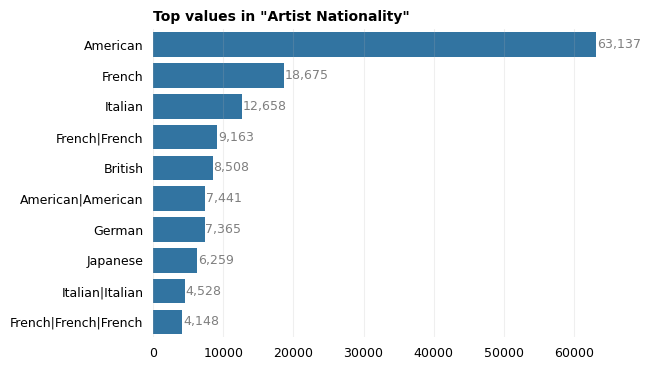

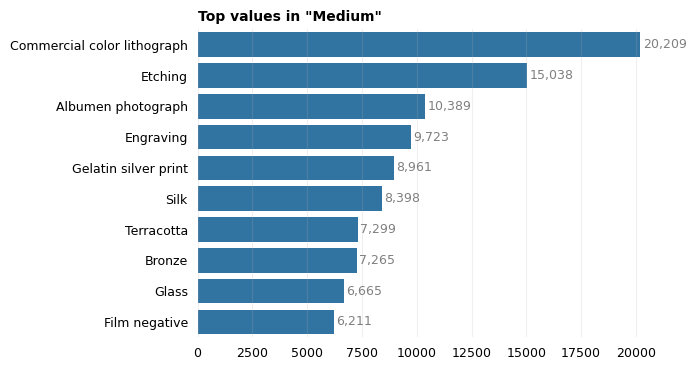

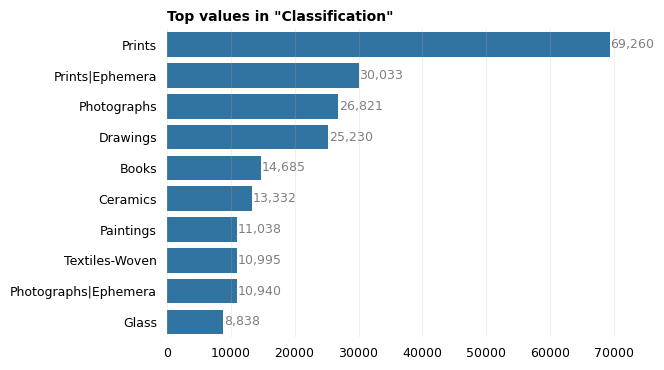

In [45]:
variables_to_plot = ['Department', 'Object Name', 'Title', 'Culture', 
                     'Artist Role', 'Artist Display Name', 'Artist Nationality', 
                     'Medium', 'Classification'
                    ]

for column in variables_to_plot:
    plot_top_values(metdb, column, n_top_values=10)

### Distribution of Acquisitions Over Time

To find the year in which the museum acquired a piece, let's look at the 'Credit Line' variable containing information about how and when the object was acquired by the museum. The year of acquisitin can be extrated from the values on this column using regular expressions.

In [103]:
metdb[['Credit Line']].head(5)

,Credit Line
0,"Gift of Heinz L. Stoppelmann, 1979"
1,"Gift of Heinz L. Stoppelmann, 1980"
2,"Gift of C. Ruxton Love, Jr., 1967"
3,"Gift of C. Ruxton Love, Jr., 1967"
4,"Gift of C. Ruxton Love, Jr., 1967"


In [47]:
# regular expression to find 4-digit year
def extract_year(credit_line):
    match = re.search(r'\b(1[89][0-9]{2}|20[01][0-9]|202[0-3])\b', str(credit_line))
    return match.group(0) if match else None

metdb['Acquisition Year'] = metdb['Credit Line'].apply(extract_year)

<p>This regex is designed to find a 4-digit year within a specific range. Let's break it down below:

- 're.search(...)' searches for the first location where the regular expression pattern finds a match in the string credit_line.
- 'str(credit_line)' converts credit_line to a string, so that our function can handle things that are not strings
- if a match is found, 'match.group(0)' will return the matching text (our 4-digit year)
- if no match is found, the function returns None ('if match else None')</p>

<p>We apply the extract_year function to each element in the 'Credit Line' column (through '.apply(extract_year)').  
Lastly, the results are stored in a new column we've named 'Acquisition Year'.</p>

>\b(1[89][0-9]{2}|20[01][0-9]|202[0-3])\b

<p>For more about the regex pattern used, I suggest reading on its explanation over on [Regex101](https://regex101.com/r/7QjOFv/1).  
This is an online regex tester and debugger that provides a detailed explanation of each regex pattern. It's a useful tool for learning and testing regular expressions in real-time.</p>

In [105]:
metdb[['Credit Line', 'Acquisition Year']].head(5)

,Credit Line,Acquisition Year
0,"Gift of Heinz L. Stoppelmann, 1979",1979
1,"Gift of Heinz L. Stoppelmann, 1980",1980
2,"Gift of C. Ruxton Love, Jr., 1967",1967
3,"Gift of C. Ruxton Love, Jr., 1967",1967
4,"Gift of C. Ruxton Love, Jr., 1967",1967


In [121]:
metdb['Acquisition Year'].nunique()

167

In [194]:
metdb['Acquisition Year'] = pd.to_numeric(metdb['Acquisition Year'], errors='coerce')
metdb = metdb.dropna(subset=['Acquisition Year'])
metdb['Acquisition Year'] = metdb['Acquisition Year'].astype(int)

lowest_acquisition_year = metdb['Acquisition Year'].min()
highest_acquisition_year = metdb['Acquisition Year'].max()

print(f"Lowest acquisition year is: {lowest_acquisition_year}\nHighest acquisition year is: {highest_acquisition_year}")

Lowest acquisition year is: 1800
Highest acquisition year is: 2017


In [196]:
acquisitions_per_year = dfAcquisitions['Acquisition Year'].value_counts().reset_index()
acquisitions_per_year.to_csv('acquisitions_per_year.txt', sep='\t')
print("The acquisitions_per_year data has been saved to 'acquisitions_per_year.txt'")

The acquisitions_per_year data has been saved to 'acquisitions_per_year.txt'


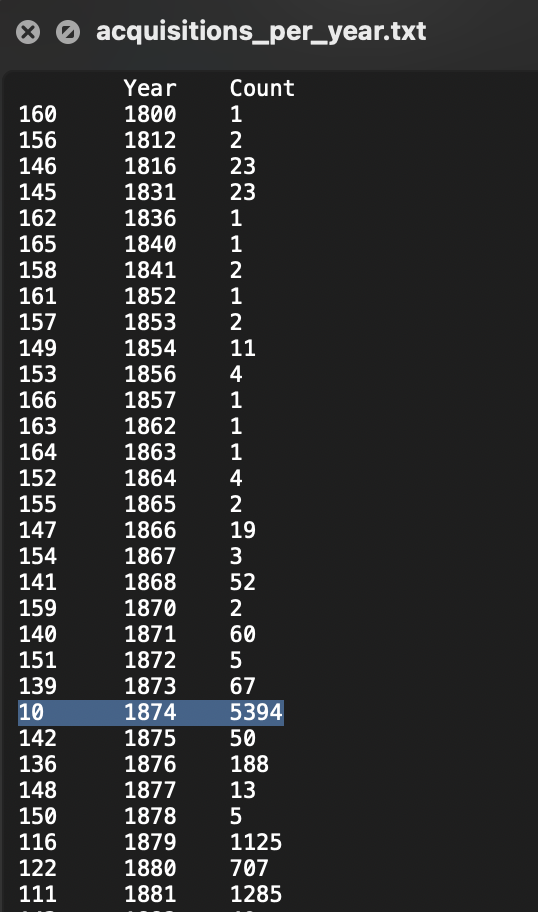

The 'Acquisition Year' column reflects only a substancial number of acquisitions from 1874 onwards. This year marks a significant period in the history of acquisitions, likely due to a notable increase in the documentation and frequency of substantial acquisitions. Limiting this analysis to acquisitions from this year onwards helps maintain a manageable scope for the project as it allows us to focus on a period with sufficient data density for meaningful output.

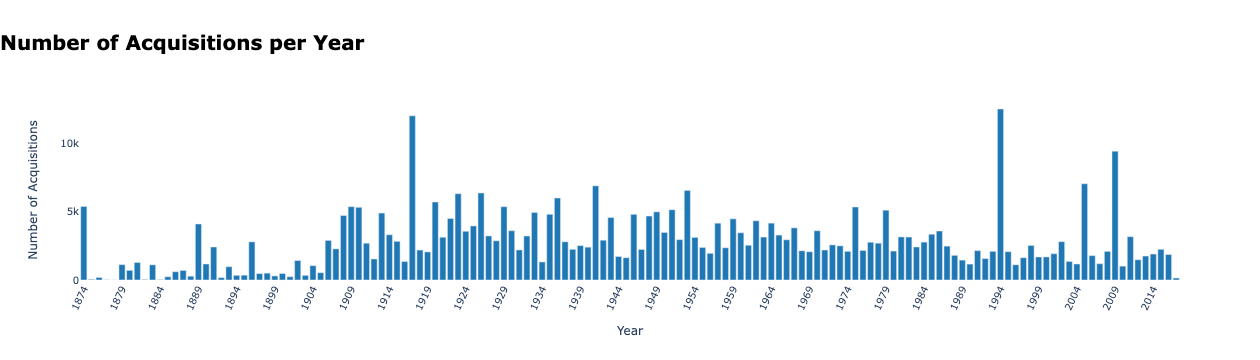

In [199]:
dfAcquisitions = metdb.dropna(subset=['Acquisition Year']).copy()
dfAcquisitions.loc[:, 'Acquisition Year'] = dfAcquisitions['Acquisition Year'].astype(int)

# filtering data to include only years from 1874 onwards
dfAcquisitions = dfAcquisitions[dfAcquisitions['Acquisition Year'] >= 1874]

acquisitions_per_year.columns = ['Year', 'Count']
acquisitions_per_year = acquisitions_per_year.sort_values('Year')

fig = px.bar(acquisitions_per_year, x='Year', y='Count',
             title='Number of Acquisitions per Year',
             labels={'Year': 'Year', 'Count': 'Number of Acquisitions'})

fig.update_traces(marker_color='rgb(31, 119, 180)')

fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=1874, dtick=5, 
               tickangle=-65, 
               tickfont=dict(size=10), 
               titlefont=dict(size=12)),
    yaxis=dict(title='Number of Acquisitions', tickfont=dict(size=10), titlefont=dict(size=12)),
    title={'text': '<b>Number of Acquisitions per Year</b>', 'x': 0.0, 'xanchor': 'left', 'font': {'color': 'black'}},
    font=dict(size=14),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

We've dropped rows with missing values in the 'Acquisition Year' column to ensure data integrity. We then converted 'Acquisition Year' to integers for numerical analysis and filtered the dataset to include only acquisitions from the year 1874 onwards, focusing on relevant data for analysis. Then we counted the number of acquisitions per year using .value_counts() to aggregate data.

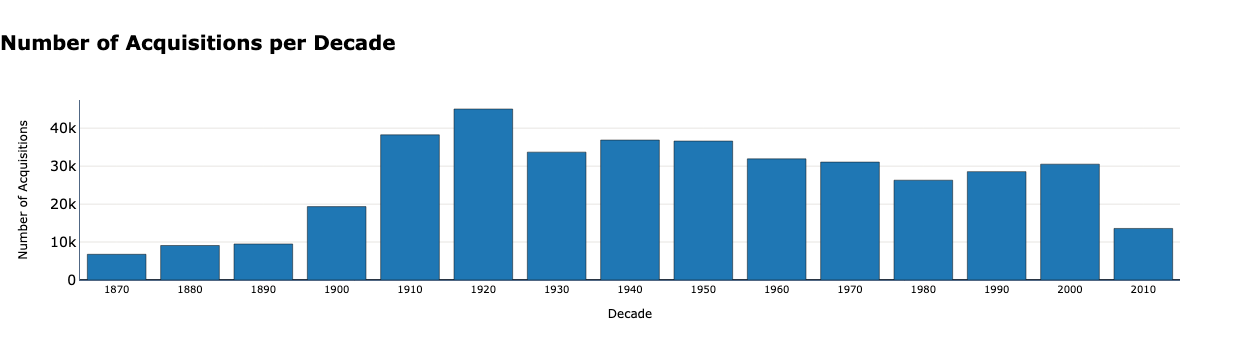

In [201]:
dfAcquisitions['Decade'] = dfAcquisitions['Acquisition Year'] // 10 * 10

# counting acquisitions per decade
acquisitions_per_decade = dfAcquisitions['Decade'].value_counts().reset_index()
acquisitions_per_decade.columns = ['Decade', 'Count']
acquisitions_per_decade = acquisitions_per_decade.sort_values('Decade')

fig = px.bar(acquisitions_per_decade, x='Decade', y='Count',
             title='Number of Acquisitions per Decade',
             labels={'Decade': 'Decade', 'Count': 'Number of Acquisitions'},
             template='plotly_dark')

fig.update_traces(marker_color='rgb(31, 119, 180)')

fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=1870, dtick=10, tickangle=0, 
               tickfont=dict(size=10, color='black'), titlefont=dict(size=12, color='black'),
               showgrid=True, showline=True,
               gridcolor='white',
               gridwidth=1.5),
    yaxis=dict(title='Number of Acquisitions', titlefont=dict(size=12, color='black'),
               showgrid=True, showline=True,
               gridcolor='rgba(234, 232, 228, 0.7)',
               gridwidth=1.5),
    title={'text': '<b>Number of Acquisitions per Decade</b>', 'x': 0.0, 'xanchor': 'left', 'font': {'color': 'black'}},
    font=dict(size=14, color='black'),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

### Geographical & Cultural Origin of Acquisitions

Now let's break down the number of acquisitions per culture of origin using the 'Culture' column. We perform a group by on the Culture column and count the number of acquisitions for each unique culture.

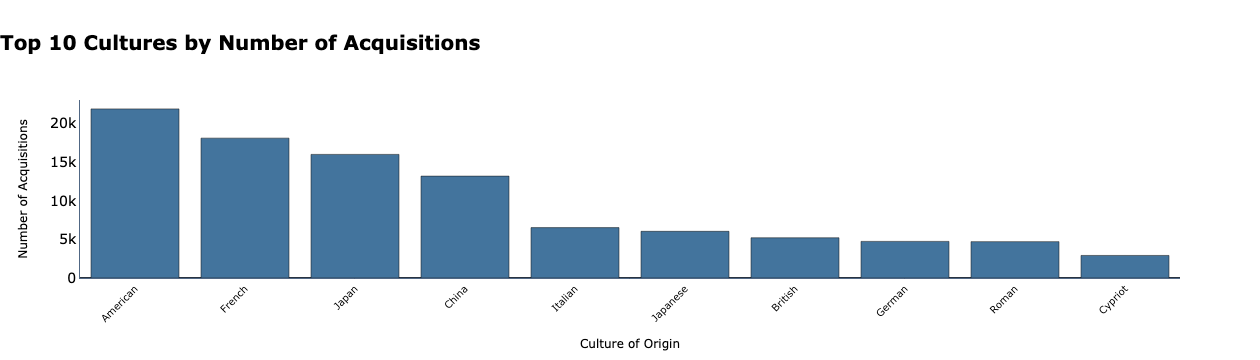

In [155]:
df_culture = metdb.dropna(subset=['Culture']).copy()

# counting acquisitions per culture
acquisitions_per_culture = df_culture['Culture'].value_counts().reset_index()
acquisitions_per_culture.columns = ['Culture', 'Count']

# top 10 cultures by number of acquisitions
top_10_cultures = acquisitions_per_culture.head(10)

fig = px.bar(top_10_cultures, x='Culture', y='Count',
             title='Top 10 Cultures by Number of Acquisitions',
             labels={'Culture': 'Culture of Origin', 'Count': 'Number of Acquisitions'},
             template='plotly_dark')

fig.update_traces(marker_color='rgb(67, 116, 157)')

fig.update_layout(
    xaxis=dict(tickangle=-45, tickfont=dict(size=10, color='black'), titlefont=dict(size=12, color='black'), showgrid=True, showline=True, gridcolor='rgba(255, 255, 255, 0.3)', gridwidth=1),
    yaxis=dict(title='Number of Acquisitions', titlefont=dict(size=12, color='black'), showgrid=True, showline=True, gridcolor='rgba(255, 255, 255, 0.3)', gridwidth=1.5),
    title={'text': '<b>Top 10 Cultures by Number of Acquisitions</b>', 'x': 0.0, 'xanchor': 'left', 'font': {'color': 'black'}},
    font=dict(size=14, color='black'),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

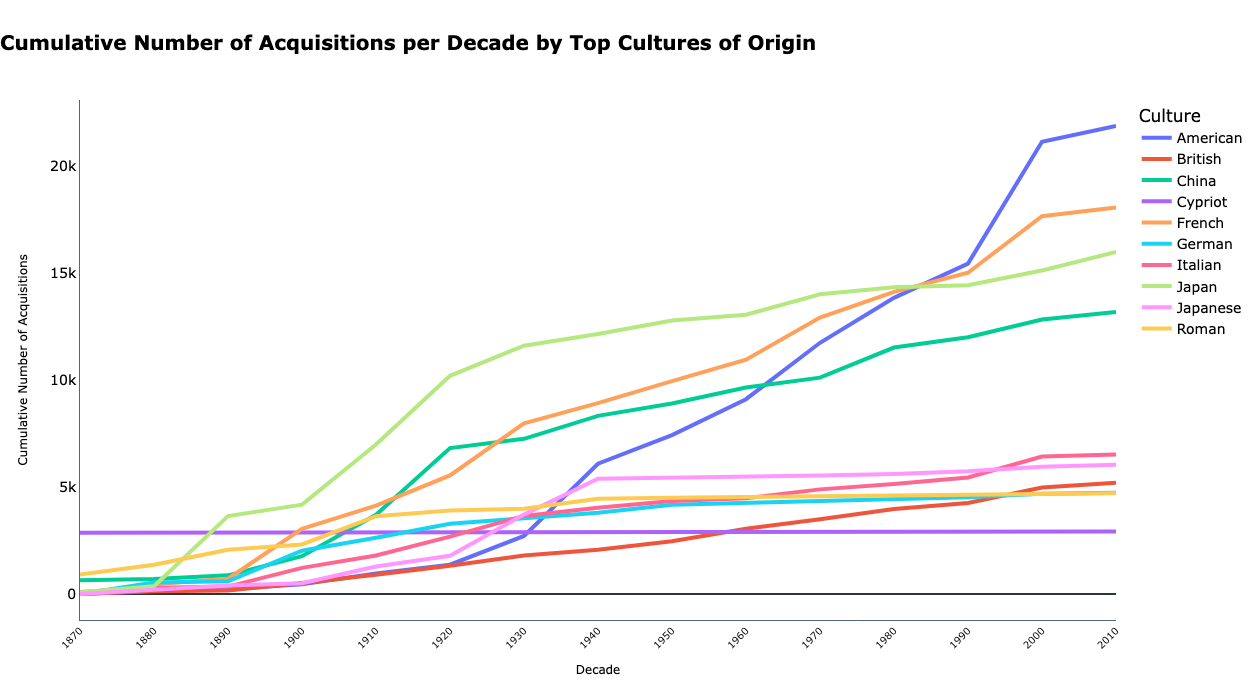

In [157]:
df_decade_culture = metdb.dropna(subset=['Acquisition Year', 'Culture']).copy()

# converting 'Acquisition Year' to numeric
df_decade_culture.loc[:, 'Acquisition Year'] = df_decade_culture['Acquisition Year'].astype(int)

df_decade_culture = df_decade_culture[df_decade_culture['Acquisition Year'] >= 1874]

# new column 'Decade' based on 'Acquisition Year'
df_decade_culture['Decade'] = (df_decade_culture['Acquisition Year'] // 10) * 10

# count of acquisitions per culture
total_acquisitions_per_culture = df_decade_culture['Culture'].value_counts().reset_index()
total_acquisitions_per_culture.columns = ['Culture', 'Total Count']

# top 10 cultures across all decades
top_cultures = total_acquisitions_per_culture.nlargest(10, 'Total Count')['Culture']

# filtering original data to include only top_cultures
df_top_cultures = df_decade_culture[df_decade_culture['Culture'].isin(top_cultures)]

# Count acquisitions per decade per culture for the top cultures
acquisitions_per_decade_top_cultures = df_top_cultures.groupby(['Decade', 'Culture']).size().reset_index(name='Count')

pivot_df = acquisitions_per_decade_top_cultures.pivot(index='Decade', columns='Culture', values='Count').fillna(0)

# calculating cumulative sum for each culture
cumulative_df = pivot_df.cumsum()

cumulative_df = cumulative_df.reset_index().melt(id_vars='Decade', value_name='Cumulative Count')

fig = px.line(cumulative_df, x='Decade', y='Cumulative Count', color='Culture',
              title='Cumulative Number of Acquisitions per Decade by Top Cultures of Origin',
              labels={'Decade': 'Decade', 'Cumulative Count': 'Cumulative Number of Acquisitions'},
              template='plotly_dark')

fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=1870, dtick=10, tickangle=-45, tickfont=dict(size=10, color='black'), titlefont=dict(size=12, color='black'),
               showgrid=True, showline=True, gridcolor='rgba(255, 255, 255, 0.3)', gridwidth=1.5),
    yaxis=dict(title='Cumulative Number of Acquisitions', titlefont=dict(size=12, color='black'),
               showgrid=True, showline=True, gridcolor='rgba(255, 255, 255, 0.3)', gridwidth=1.5),
    title={'text': '<b>Cumulative Number of Acquisitions per Decade by Top Cultures of Origin</b>', 'x': 0.0, 'xanchor': 'left', 'font': {'color': 'black'}},
    font=dict(size=14, color='black'),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    width=1000,
    height=700
)

fig.update_traces(line=dict(width=4), marker=dict(size=8))

fig.show()